Привет, Ыманбек!) Меня зовут Дуолан👋 Поздравляю тебя с первым проектом по машинному обучению 🔥 
<br> Сегодня я буду проверять твой проект. Давай вместе доведем его до идеала😉
<br> Дальнейшее общение будет происходить на «ты», если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий («исправил», «не понятно как исправить ошибку», ...)
<br> Пожалуйста, не удаляй мои комментарии, они будут необходимы для повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-warning">
<b>Совет:</b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Замечание:</b> Если требуются исправления
</div>

Работа не может быть принята с красными комментариями.

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-info">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

## Откройте и изучите файл

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyRegressor

<div class="alert alert-block alert-success">
<b>Успех:</b> Правильное решение — выделять отдельную ячейку в начале проекта под подключение библиотек и настройки. Tак код легче поддерживать 👌
</div>

In [4]:
data=pd.read_csv('/datasets/users_behavior.csv')

In [5]:
data.head(10)

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
calls,3214.0,63.038892,33.236368,0.0,40.0000,62.000,82.0000,244.00
minutes,3214.0,438.208787,234.569872,0.0,274.5750,430.600,571.9275,1632.06
messages,3214.0,38.281269,36.148326,0.0,9.0000,30.000,57.0000,224.00
mb_used,3214.0,17207.673836,7570.968246,0.0,12491.9025,16943.235,21424.7000,49745.73
is_ultra,3214.0,0.306472,0.461100,0.0,0.0000,0.000,1.0000,1.00


In [8]:
data.isna().sum()

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
data['calls']=data['calls'].astype(int)
data['messages']=data['messages'].astype(int)

<div class="alert alert-block alert-success">
<b>Успех:</b> Ты хорошо владеешь методами первичного анализа данных 👍
</div>

<div class="alert alert-block alert-warning">
<b>Совет:</b>

Стоит посмотреть на соотношение классов в выборке. Это можно сделать так:

data.is_ultra.value_counts()
    
Если есть дисбаланс, нужно смотреть на дополнительные метрики помимо accuracy. В данной выборке у нас только 985 наблюдений класса 1, тогда как остальные 2229 — класса 0. Представь, что модель предсказала правильно только 2229 наблюдений класса 0, accuracy будет около 70%. Вроде много, но по факту модель вообще не понимает и не умеет предсказывать класс 1. Такие нюансы можно оценить с помощью recall и precision.
 
Еще стоит проверить данные на наличие сильно-скоррелированных (мультиколлинеарных признаков). Если таковые есть, стоит удалить по одному из пары, иначе они будут доминировать при обучении.
    
У вас не было этого в тренажере, но мне хочется сделать ревью максимально полезным и развивающим :) Поэтому посмотри, пожалуйста, на указанные нюансы. 
</div>

## Разбейте данные на выборки

In [11]:
data_train, data_valid_test=train_test_split(data,train_size=0.6,test_size=0.4,random_state=1234)
data_valid,data_test=train_test_split(data_valid_test,test_size=0.5,random_state=1234)

In [12]:
len(data_train)# выборка для обучения

1928

In [13]:
len(data_valid_test)# выборка валидационная

1286

In [14]:
len(data_test) # выборка тестовая

643

<div class="alert alert-block alert-success">
<b>Успех:</b> Данные поделены верно, пропорции выбраны адекватные 👍
</div>

<div class="alert alert-block alert-warning">
<b>Совет:</b>

Можно использовать параметр stratify = y в функции train_test_split( ), где y – соответствующая целевая переменная. Данные разделятся на два кластера (наблюдения класса 0 и наблюдения класса 1), и в валидационную выборку попадут по 20% наблюдений из каждого кластера:

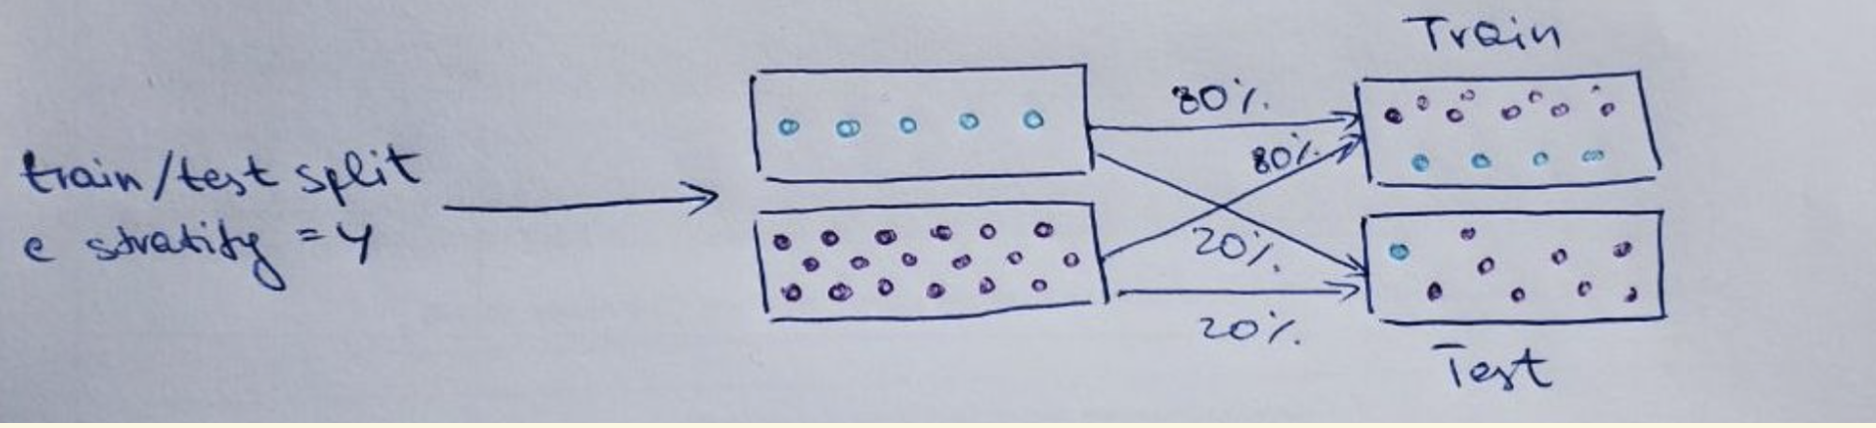
    
То есть, если соотношение классов в оригинальной выборке было 2:5, то в обучающей и валидационной выборках оно сохранится таким же. Такой подход в чем-то решает проблему несбалансированных классов.

Это можно сделать так

Сначала нужно отделить от данных целевую переменную:

X = data.drop('is_ultra', axis=1)

y = data['is_ultra']

Потом делим данные на тренировочную и валидационную выборки:

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, random_state=12345, stratify=y)

указываем stratify=y, чтобы сохранить соотношение классов при разбиении
    
Далее делим валидационную выборку на валидационную и тестовую:

X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, random_state=12345, stratify=y_valid)

в этом случае stratify указываем y_valid

## Исследуйте модели

In [15]:
features_train=data_train.drop(['is_ultra'],axis=1)
target_train=data_train['is_ultra']

In [16]:
features_train.head()# Признаки 
target_train.head()# целевой признак

265     1
1410    0
728     0
552     1
3117    0
Name: is_ultra, dtype: int64

In [17]:
features_valid=data_valid.drop(['is_ultra'],axis=1) # Признаки 
target_valid=data_valid['is_ultra'] # целевой признак

 валидационная 

In [18]:
features_test=data_valid.drop(['is_ultra'],axis=1) # Признаки 
target_test=data_valid['is_ultra'] # целевой признак

тестовая 

Проверьте модель на тестовой выборке

# Модель "Дерево решений"

In [19]:
for estim in range(1,50,2):    
    model_forest=RandomForestClassifier(max_depth=10,n_estimators=estim,random_state=1234,min_samples_leaf=5) # присваиваем модели имя
    model_forest.fit(features_train,target_train) # обучаем
    prediction_forest=model_forest.predict(features_valid) # проверяем
    print('n_estimators:',estim,end="")
    print(' accuracy:',accuracy_score(prediction_forest,target_valid))

n_estimators: 1 accuracy: 0.8055987558320373
n_estimators: 3 accuracy: 0.8149300155520995
n_estimators: 5 accuracy: 0.8320373250388803
n_estimators: 7 accuracy: 0.838258164852255
n_estimators: 9 accuracy: 0.8429237947122862
n_estimators: 11 accuracy: 0.8429237947122862
n_estimators: 13 accuracy: 0.8398133748055988
n_estimators: 15 accuracy: 0.8398133748055988
n_estimators: 17 accuracy: 0.838258164852255
n_estimators: 19 accuracy: 0.838258164852255
n_estimators: 21 accuracy: 0.8367029548989113
n_estimators: 23 accuracy: 0.8367029548989113
n_estimators: 25 accuracy: 0.8429237947122862
n_estimators: 27 accuracy: 0.838258164852255
n_estimators: 29 accuracy: 0.8351477449455676
n_estimators: 31 accuracy: 0.8351477449455676
n_estimators: 33 accuracy: 0.8351477449455676
n_estimators: 35 accuracy: 0.8351477449455676
n_estimators: 37 accuracy: 0.833592534992224
n_estimators: 39 accuracy: 0.833592534992224
n_estimators: 41 accuracy: 0.8351477449455676
n_estimators: 43 accuracy: 0.838258164852255


качество модели "дерево предсказания"=0.84

<div class="alert alert-block alert-warning">
<b>Совет:</b> Попробуй задать более широкий диапазон значений:
</div>

```python
for depth in range(2, 22, 2):
    for est in range(100, 1001, 100):
        ...
```

# Модель "Случайный лес"

In [20]:
for estim in range(1,50,2):    
    model_forest=RandomForestClassifier(max_depth=10,n_estimators=estim,random_state=1234,min_samples_leaf=5) # присваиваем модели имя
    model_forest.fit(features_train,target_train) # обучаем
    prediction_forest=model_forest.predict(features_valid) # проверяем
    print('n_estimators:',estim,end="")
    print(' accuracy:',accuracy_score(prediction_forest,target_valid))

n_estimators: 1 accuracy: 0.8055987558320373
n_estimators: 3 accuracy: 0.8149300155520995
n_estimators: 5 accuracy: 0.8320373250388803
n_estimators: 7 accuracy: 0.838258164852255
n_estimators: 9 accuracy: 0.8429237947122862
n_estimators: 11 accuracy: 0.8429237947122862
n_estimators: 13 accuracy: 0.8398133748055988
n_estimators: 15 accuracy: 0.8398133748055988
n_estimators: 17 accuracy: 0.838258164852255
n_estimators: 19 accuracy: 0.838258164852255
n_estimators: 21 accuracy: 0.8367029548989113
n_estimators: 23 accuracy: 0.8367029548989113
n_estimators: 25 accuracy: 0.8429237947122862
n_estimators: 27 accuracy: 0.838258164852255
n_estimators: 29 accuracy: 0.8351477449455676
n_estimators: 31 accuracy: 0.8351477449455676
n_estimators: 33 accuracy: 0.8351477449455676
n_estimators: 35 accuracy: 0.8351477449455676
n_estimators: 37 accuracy: 0.833592534992224
n_estimators: 39 accuracy: 0.833592534992224
n_estimators: 41 accuracy: 0.8351477449455676
n_estimators: 43 accuracy: 0.838258164852255


качество модели "случайный лес"=0.84

# Модель "Логистическая регрессия"

In [21]:
model_logistic_Reg=LogisticRegression() # присваиваем модели имя
model_logistic_Reg.fit(features_train,target_train) # обучаем
predict_LogisticReg=model_logistic_Reg.predict(features_valid) # проверяем
print('accuracy:',accuracy_score(predict_LogisticReg,target_valid))

accuracy: 0.7589424572317263


"Логистическая регрессия"= 0.75 Самое низкое качество!

<div class="alert alert-block alert-success">
<b>Круто:</b> По модельной части замечаний нет 👌 Все сделано четко!)
</div>

## Проверьте модель на тестовой выборке

# Новые модели: случайный лес

In [22]:
model_forest=RandomForestClassifier(max_depth=10,n_estimators=9,random_state=1234,min_samples_leaf=5)
model_forest.fit(features_train,target_train)
prediction_forest=model_forest.predict(features_test)
print(' accuracy:',accuracy_score(prediction_forest,target_test))

 accuracy: 0.8429237947122862


# Логистическая регрессия

In [23]:
model_logistic_Reg=LogisticRegression() # присваиваем модели имя
model_logistic_Reg.fit(features_test,target_test) # обучаем
predict_LogisticReg=model_logistic_Reg.predict(features_test) # проверяем
print('accuracy:',accuracy_score(predict_LogisticReg,target_test))

accuracy: 0.7122861586314152


# Дерево предсказаний

In [24]:
model_tree=DecisionTreeClassifier(random_state=1234, max_depth=7)
model_tree.fit(features_train,target_train)
prediction_tree=model_tree.predict(features_test)

print(' accuracy:',accuracy_score(prediction_tree,target_test))

 accuracy: 0.8320373250388803


Вывод:
Обучая три разный модели были полученны лучшие метрики качества:

- Качество модели "Дерево предсказания" при гиперпараметрах   0.83
- Качество модели "Случайный лес" при гиперпараметрах  0.84
- Качество модели "Логистическая регрессия": 0.71

<div class="alert alert-block alert-success">
<b>Круто:</b> Отличный результат!)
</div>

## (бонус) Проверьте модели на адекватность

In [27]:
dummy_regr = DummyRegressor(strategy='mean')
dummy_regr.fit(features_test,target_test)
dummy_regr.predict(features_test)
dummy_regr.score(features_test,target_test)

0.0

<div class="alert alert-block alert-warning">
<b>Совет:</b> Попробуй задать strategy='most_frequent'. Тогда предсказания будут только 0, тогда accuracy будет равен доле отрицательного класса
</div>

score(X, y, sample_weight=Нет)
Возвращает коэффициент определения R^2 предсказания.
Коэффициент R^2 определяется как , где — остаточная сумма квадратов и — общая сумма квадратов.
Наилучший возможный балл равен 1,0,
и он может быть отрицательным (потому что модель может быть сколь угодно хуже).

<div class="alert alert-block alert-danger">
<b>Замечание:</b> Не забывай про финальный вывод)
</div>

# <font color='orange'>Общее впечатление</font>
* Этот проект выполнен очень хорошо
* Видно, что приложено много усилий
* Молодец, что структурируешь ноутбук, приятно проверять такие работы
* У тебя чистый и лаконичный код
* Исправь, пожалуйста, мои замечания. Затем отправляй на повторную проверку
* Также я оставил несколько советов. Исправь их если останется время
* Жду новую версию проекта 👋

# <font color='orange'>2. Общее впечатление</font>
* Спасибо за быстрое внесение правок
* Теперь проект выглядит лучше )
* Критических замечаний нет
* Молодец, отличная работа!
* Надеюсь, ревью было полезным
* Удачи в дальнейшем обучении 👋